<a href="https://colab.research.google.com/github/feysel2003/ML/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Housing Price Prediction Project

## **1. Introduction**
In this project, we will analyze a dataset of housing prices to understand what factors (like area, bedrooms, and furnishing) influence the cost of a house.

**Our Goal:** To build Machine Learning models that can accurately predict the price of a house based on its features.

**We will follow this workflow:**
1.  **Data Cleaning:** Ensuring the data is error-free.
2.  **Exploratory Data Analysis (EDA):** Visualizing relationships in the data.
3.  **Preprocessing:** Converting text data into numbers for the machine.
4.  **Model Building:** Training Linear, KNN, and Decision Tree regressions.
5.  **Evaluation:** checking accuracy using metrics like RMSE and R².

## **2. Import Libraries**
First, we need to bring in the Python tools (libraries) that will help us work with data.
*   **Pandas:** For reading the data table.
*   **Numpy:** For mathematical calculations.
*   **Matplotlib & Seaborn:** For drawing charts and graphs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **3. Load the Dataset**
Now, we will read the CSV file containing our housing data and store it in a variable called `df` (short for DataFrame).

* Upload the csv file from the local

In [3]:

from google.colab import files

uploaded = files.upload()

Saving Housing Price.csv to Housing Price.csv


In [4]:
df = pd.read_csv('Housing Price.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


## **4. Data Overview (Head)**
Let's look at the first 5 rows of the dataset to understand what the data looks like and what columns we have.

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## **5. Check Data Info**
We need to check the type of data in each column (e.g., is it a number or text?) and how many total rows we have. This helps us plan our preprocessing.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## **6. Data Cleaning: Check for Nulls**
Before analysis, we must ensure there are no missing values (empty cells) in our dataset. If there are, we need to fix them.

In [7]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0



## **6.1 EDA: Distribution of Price**
*  **Visualize the Target (Price)**

We need to see how housing prices are distributed. This helps us understand if most houses are expensive, cheap, or average. We use a histogram for this.

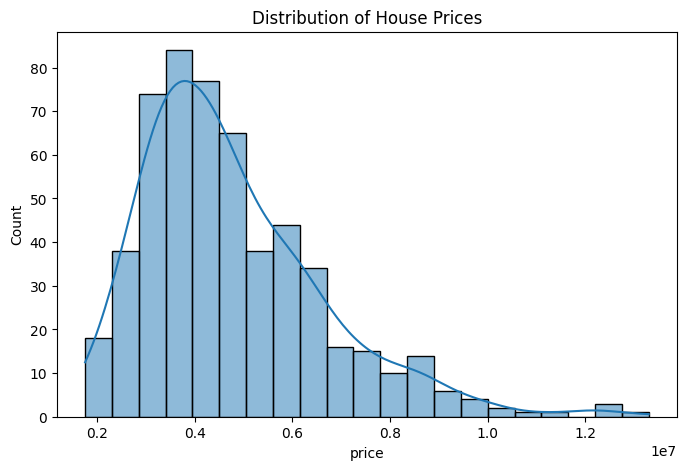

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

## **6.2 EDA: Area vs Price**
*  **Visualize Numerical Relationships (Area vs Price)**

Intuition says larger houses should cost more. Let's verify this relationship using a scatter plot.

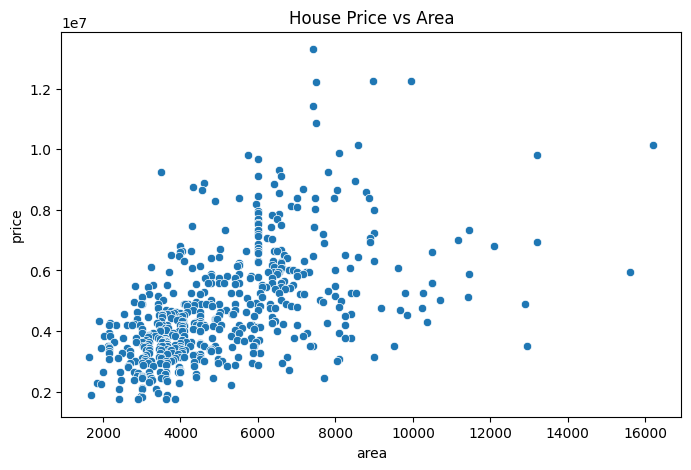

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('House Price vs Area')
plt.show()

## **6.3 EDA: Furnishing Status vs Price**
*  **Visualize Categorical Relationships**

Does having a furnished house increase the price? We use a Box Plot to compare the price ranges for different furnishing statuses.

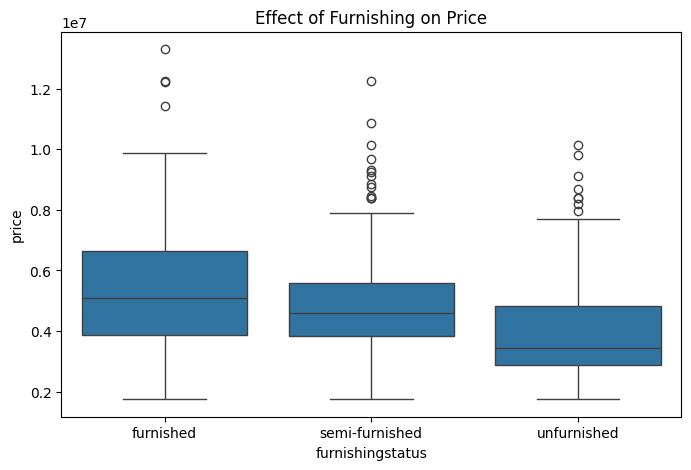

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Effect of Furnishing on Price')
plt.show()

## **7 Preprocessing: Convert Yes/No to 1/0**
*  **Preprocessing - Binary Columns**

Machine learning models cannot understand text like "yes" or "no". We must convert these into numbers (1 for yes, 0 for no). We apply this to all binary columns at once.

In [11]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[varlist] = df[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


## **7.1 Preprocessing: Convert Furnishing Status**
*  **Preprocessing - Categorical Columns**

The `furnishingstatus` column has three values (furnished, semi-furnished, unfurnished). We convert this text into numbers using a map function (0, 1, and 2).

In [12]:
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


## **7.3 Data Analysis: Correlation Heatmap**
Now that all our data is numeric, we can check which features are most strongly related (correlated) to the Price. Lighter/Redder colors usually mean a stronger relationship.

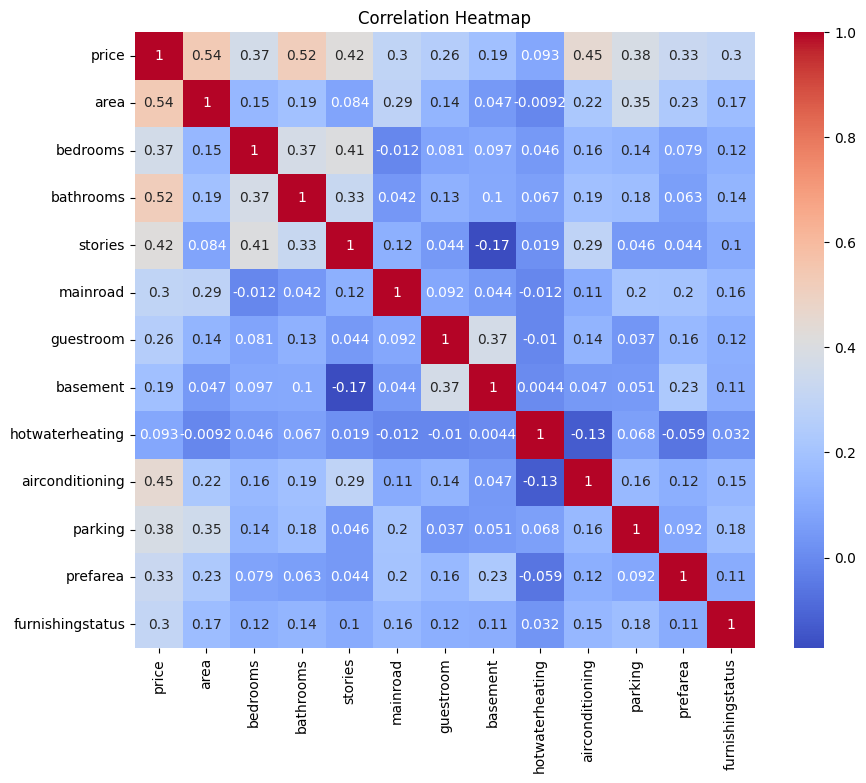

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **7. Define Features (X) and Target (y)**
We need to separate our dataset into two parts:
1.  **X (Features):** The data used to make predictions (Area, Bedrooms, etc.). We drop the 'price' column because that is the answer.
2.  **y (Target):** The data we want to predict (Price).

*   `axis=1`: This parameter tells Python we are dropping a **column** (vertical), not a row (horizontal).

In [14]:
X = df.drop('price', axis=1)
y = df['price']
print("Features and Target defined.")

Features and Target defined.


## **8. Stratified Splitting**
To ensure we don't accidentally put all "Furnished" houses in one group, we use the `stratify` parameter.

This forces the Train and Test sets to have the exact same ratio of furnishing statuses.

We must split our data. We teach the model with the **Train** set, and verify its accuracy with the **Test** set.

*   `test_size=0.2`: We keep 20% of the data hidden for testing and use 80% for training.
*   `random_state=42`: This ensures that every time we run the code, it splits the data exactly the same way (other than FurnishedStatus for consistency).

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=df['furnishingstatus']
)

print("Data split successfully with Stratification!")

Data split successfully with Stratification!


## **8.1 Sanity Check: Is the Split Fair?**
We compare the averages of the features in Train vs Test.
*   If the numbers are close, the split is fair.
*   If the numbers are very different, we might need to change our `random_state` number.
*   **Note:** Since we used `StandardScaler` in Step 9, the `Train_Average` should be very close to 0.
*   We use `axis=0` to ensure we calculate the mean for each feature column individually, not the whole table.
*   Temporarily split the raw X and y again (same random_state to match your model)
*   Calculate the Difference
*   Show the table

In [43]:

X_train_raw, X_test_raw, _, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['furnishingstatus'])

comparison_raw = pd.DataFrame({
    'Feature': X.columns,
    'Train_Avg': X_train_raw.mean(axis=0),
    'Test_Avg': X_test_raw.mean(axis=0)
})


comparison_raw['Difference'] = abs(comparison_raw['Train_Avg'] - comparison_raw['Test_Avg'])

print(comparison_raw)

                           Feature    Train_Avg     Test_Avg  Difference
area                          area  5163.956422  5096.880734   67.075688
bedrooms                  bedrooms     2.974771     2.926606    0.048165
bathrooms                bathrooms     1.282110     1.302752    0.020642
stories                    stories     1.827982     1.715596    0.112385
mainroad                  mainroad     0.869266     0.816514    0.052752
guestroom                guestroom     0.178899     0.174312    0.004587
basement                  basement     0.337156     0.403670    0.066514
hotwaterheating    hotwaterheating     0.045872     0.045872    0.000000
airconditioning    airconditioning     0.311927     0.330275    0.018349
parking                    parking     0.699541     0.669725    0.029817
prefarea                  prefarea     0.236239     0.229358    0.006881
furnishingstatus  furnishingstatus     0.931193     0.926606    0.004587


In [44]:

train_means = X_train.mean(axis=0)
test_means = X_test.mean(axis=0)


comparison = pd.DataFrame({
    'Feature': X.columns,
    'Train_Average': train_means,
    'Test_Average': test_means
})

comparison['Difference'] = abs(comparison['Train_Average'] - comparison['Test_Average'])

# Show the table
print(comparison)

                           Feature  Train_Average  Test_Average  Difference
area                          area    5163.956422   5096.880734   67.075688
bedrooms                  bedrooms       2.974771      2.926606    0.048165
bathrooms                bathrooms       1.282110      1.302752    0.020642
stories                    stories       1.827982      1.715596    0.112385
mainroad                  mainroad       0.869266      0.816514    0.052752
guestroom                guestroom       0.178899      0.174312    0.004587
basement                  basement       0.337156      0.403670    0.066514
hotwaterheating    hotwaterheating       0.045872      0.045872    0.000000
airconditioning    airconditioning       0.311927      0.330275    0.018349
parking                    parking       0.699541      0.669725    0.029817
prefarea                  prefarea       0.236239      0.229358    0.006881
furnishingstatus  furnishingstatus       0.931193      0.926606    0.004587


## **9. Feature Scaling (Normalization)**
Housing prices are in millions (e.g., 13,000,000), while bedroom counts are small (e.g., 2, 3). This huge difference in scale confuses Regression models. We use **StandardScaler** to bring all numbers to a similar range.

*   `fit_transform()`: Learns the scale from training data and changes it.
*   `transform()`: Changes the test data using the *same* scale learned from training.

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **10. Model 1: Linear Regression**
We start with the simplest algorithm. **Linear Regression** tries to draw a straight line through the data points that best fits the relationship between features and price.

*   `LinearRegression()`: Initializes the mathematical model.
*   `fit(X_train, y_train)`: The training process. The model looks at the inputs (X) and the answers (y) to learn the rules.

In [46]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear Regression Model Trained.")

Linear Regression Model Trained.


## **11. Evaluation: Linear Regression**
Now we test the model using the metrics you requested.

*   **MAE (Mean Absolute Error):** The average difference between predicted and actual price.
*   **MSE/RMSE:** Penalizes large errors more heavily.
*   **R² Score:** Explains how well the independent variables explain the variance in price (1.0 is perfect).

*   `y_test`: The actual real prices.
*   `y_pred`: The prices our model guessed.

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lr_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 725949.3328907248
RMSE: 908830.0894893687
R2 Score: 0.7728898145444733


## **12. Interpreting the Linear Model**
Since Linear Regression draws a line, it assigns a "weight" (coefficient) to every feature. A high positive number means that feature increases the house price significantly.
*   `pd.DataFrame`: We create a table to view the feature names next to their coefficients.
*   `sort_values`: We sort them to see the most important features at the top.

In [48]:
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)

,Coefficient
bathrooms,504591.544836
area,500707.541118
stories,377413.782333
airconditioning,374244.149253
parking,244291.909284
prefarea,233891.285918
hotwaterheating,201042.639079
mainroad,197170.902530
basement,179651.288684
furnishingstatus,163248.736811


## **11.1 Custom Prediction: Linear Regression**
Let's predict the price of a specific house (8000 sqft, 3 Bed, 2 Bath, Furnished).

**Crucial:** We must use `scaler.transform` because the model learned on scaled numbers, not raw numbers.

We will define a "**Dream House**" with these features:

*   Area: 8000 sqft
*   Bedrooms: 3
*   Bathrooms: 2
*   Stories: 2
*   Mainroad: Yes (1)
*   Guestroom: No (0)
*   Basement: No (0)
*   Hotwater: No (0)
*   AC: Yes (1)
*   Parking: 2 spots
*   PrefArea: Yes (1)
*   Furnishing: Furnished (2)




In [49]:
my_house = np.array([[8000, 3, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2]])
my_house_scaled = scaler.transform(my_house)
linear_pred = lr_model.predict(my_house_scaled)
print(f"Linear Model predicts: {linear_pred[0]:,.2f}")

Linear Model predicts: 7,690,997.15


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **13. Model 2: Multiple Linear Regression**
Actually, we technically already did this!
*   **Simple Linear Regression** uses only 1 feature (e.g., Price vs Area).
*   **Multiple Linear Regression** uses all features (Area, Bedrooms, Aircon, etc.).
Since we passed `X_train` (which has all columns) into our previous model, `lr_model` **IS** already a Multiple Linear Regression model. We don't need to write new code for this.

In [50]:
print("Our 'lr_model' used all columns, so it is already a Multiple Linear Regression model.")

Our 'lr_model' used all columns, so it is already a Multiple Linear Regression model.


## **14. Model 3: Polynomial Regression**
Linear regression draws a straight line. But sometimes, relationships are curved (e.g., price might skyrocket for huge mansions). Polynomial regression creates "squared" or "cubed" versions of features to capture these curves.
*   `PolynomialFeatures(degree=2)`: Creates squared versions of our data ($x^2$).
*   `fit_transform`: Transforms our standard features into polynomial features.
*   `LinearRegression()`: We still use linear regression, but on this new curved data.

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
print("Polynomial Regression Trained.")

Polynomial Regression Trained.


## **15. Evaluation: Polynomial Regression**
Let's see if the curved line fits better than the straight line by checking the R² score.
*   Note: If the R² is very high on training but low on testing, it means the model "Overfitted" (memorized the data).

In [52]:
y_pred_poly = poly_model.predict(X_test_poly)
print("Polynomial Regression R2 Score:", r2_score(y_test, y_pred_poly))
print("Polynomial RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

Polynomial Regression R2 Score: 0.7049584394631567
Polynomial RMSE: 1035871.7504454693


## **15.1 Custom Prediction: Polynomial Regression**
For the polynomial model, we must do two transformations:
1. Scale the data (done in the previous step).
2. Transform it to polynomial features (squared/cubed) using `poly.transform`.

In [33]:
my_house_poly = poly.transform(my_house_scaled)
poly_pred = poly_model.predict(my_house_poly)
print(f"Polynomial Model predicts: {poly_pred[0]:,.2f}")

Polynomial Model predicts: 8,756,662.18


## **16. Model 4: KNN Regression**
KNN (K-Nearest Neighbors) finds the 'K' most similar houses in the dataset and averages their prices to make a prediction.
*   `n_neighbors=5`: We tell the model to look at the 5 closest houses.
*   `metric='minkowski'`: The method used to calculate distance (math for "how close is this house?").

In [23]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
print("KNN Regression Model Trained.")

KNN Regression Model Trained.


## **17. Evaluation: KNN Regression**
Let's check the accuracy of the KNN model. KNN usually works well when similar houses have similar prices.

In [24]:
y_pred_knn = knn_model.predict(X_test)
print("KNN R2 Score:", r2_score(y_test, y_pred_knn))
print("KNN RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

KNN R2 Score: 0.583257108162042
KNN RMSE: 1451363.5731497656


## **17.1 Custom Prediction: KNN Regression**
KNN looks for the 5 most similar houses to our "Dream House" in the database and averages their prices.

In [35]:
knn_pred = knn_model.predict(my_house_scaled)
print(f"KNN Model predicts: {knn_pred[0]:,.2f}")

KNN Model predicts: 7,973,000.00


## **18. Model 4: Decision Tree Regression**
The Decision Tree algorithm splits the data into smaller and smaller groups (like a flowchart) to make predictions. It captures complex patterns but can easily overfit if not careful.
*   `DecisionTreeRegressor`: The model tool.
*   `random_state=42`: Ensures the tree splits the same way every time we run it.

In [25]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
print("Decision Tree Model Trained.")

Decision Tree Model Trained.


## **19. Evaluation: Decision Tree**
Let's see how the Decision Tree performed compared to the others.

In [26]:
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree R2 Score:", r2_score(y_test, y_pred_tree))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))

Decision Tree R2 Score: 0.41807989642586374
Decision Tree RMSE: 1715038.20403057


## **19.1 Visualizing the Decision Tree**
We can draw the actual tree to see the logic. Since the full tree is huge, we will only plot the top 3 levels (`max_depth=3`) to keep it readable.
*   **Root Node:** The first box at the top (usually the most important feature, like Price or Area).
*   **Branches:** The Yes/No paths.
*   **filled=True:** Colors the boxes to indicate value (darker colors = higher prices).

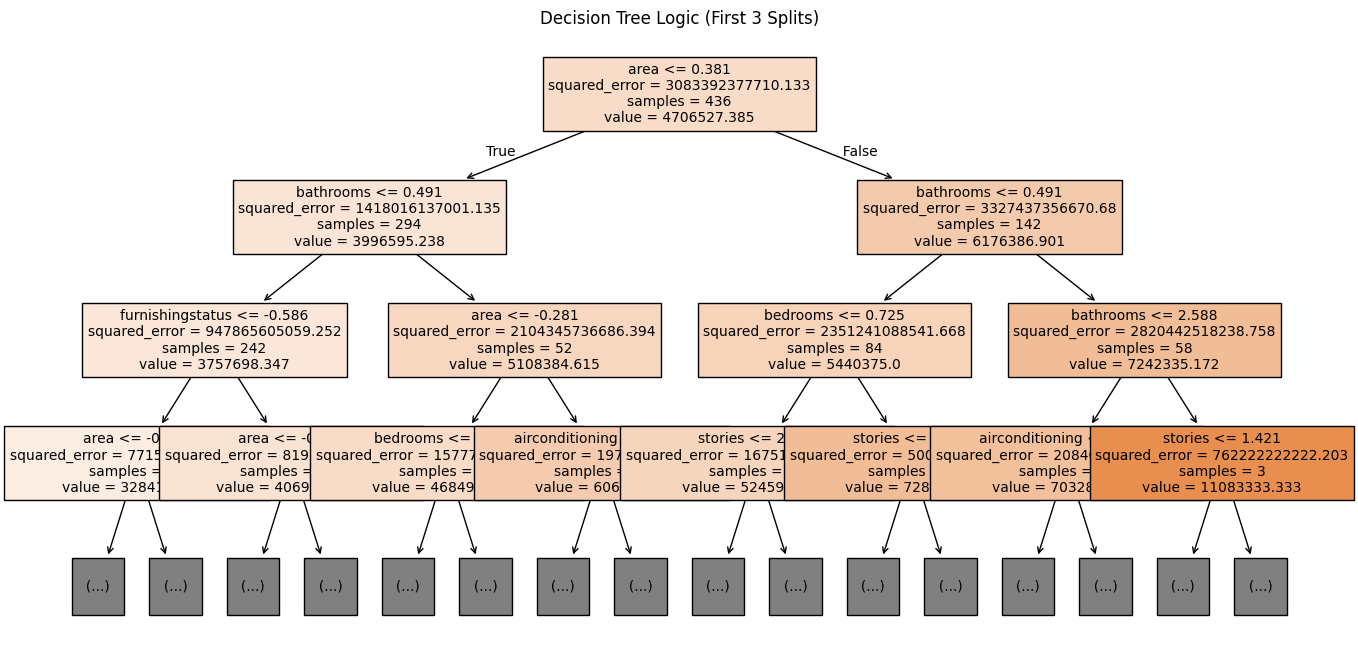

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 8))
plot_tree(tree_model, feature_names=X.columns, filled=True, max_depth=3, fontsize=10)
plt.title("Decision Tree Logic (First 3 Splits)")
plt.show()

## **19.2 Decision Tree Rules (Text Format)**
If the diagram is too hard to read, we can print the logic as text rules. This shows exactly what thresholds the model is using.
*   `export_text`: Converts the tree logic into a list of "if-this-then-that" rules.

In [31]:
from sklearn.tree import export_text
rules = export_text(tree_model, feature_names=list(X.columns), max_depth=2)
print(rules)

|--- area <= 0.38
|   |--- bathrooms <= 0.49
|   |   |--- furnishingstatus <= -0.59
|   |   |   |--- truncated branch of depth 15
|   |   |--- furnishingstatus >  -0.59
|   |   |   |--- truncated branch of depth 18
|   |--- bathrooms >  0.49
|   |   |--- area <= -0.28
|   |   |   |--- truncated branch of depth 11
|   |   |--- area >  -0.28
|   |   |   |--- truncated branch of depth 7
|--- area >  0.38
|   |--- bathrooms <= 0.49
|   |   |--- bedrooms <= 0.72
|   |   |   |--- truncated branch of depth 15
|   |   |--- bedrooms >  0.72
|   |   |   |--- truncated branch of depth 5
|   |--- bathrooms >  0.49
|   |   |--- bathrooms <= 2.59
|   |   |   |--- truncated branch of depth 10
|   |   |--- bathrooms >  2.59
|   |   |   |--- truncated branch of depth 3



## **19.3 Custom Prediction: Decision Tree**
The Decision Tree follows its flowchart rules (e.g., "Is area > 5000? Yes") to arrive at a specific price leaf.

In [36]:
tree_pred = tree_model.predict(my_house_scaled)
print(f"Decision Tree predicts: {tree_pred[0]:,.2f}")

Decision Tree predicts: 9,310,000.00


## **20. Defining Advanced Metrics**
You requested **Adjusted R²** and **MAPE**. These aren't always shown by default, so we calculate them here for our Linear Regression model (our baseline).
*   **Adjusted R²:** R² usually increases if you just add *more* data, even if it's junk. Adjusted R² fixes this by penalizing useless features.
*   **MAPE:** Mean Absolute Percentage Error. It tells us, on average, how much percent (%) our prediction is off.

In [27]:
from sklearn.metrics import mean_absolute_percentage_error
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Linear Model -> MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2%}, Adj R2: {adj_r2:.4f}")

Linear Model -> MAPE: 21.31%, Adj R2: 0.6057


## **21. Final Comparison Table**
Now we compare all four models side-by-side to choose the winner. We look at the **R² Score** (higher is better) and **RMSE** (lower is better).

In [28]:
models = pd.DataFrame({
    'Model': ['Linear', 'Polynomial', 'KNN', 'Decision Tree'],
    'R2 Score': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_poly), r2_score(y_test, y_pred_knn), r2_score(y_test, y_pred_tree)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(mean_squared_error(y_test, y_pred_poly)), np.sqrt(mean_squared_error(y_test, y_pred_knn)), np.sqrt(mean_squared_error(y_test, y_pred_tree))]
})
models.sort_values(by='R2 Score', ascending=False)

,Model,R2 Score,RMSE
1,Polynomial,0.651629,1.326976e+06
0,Linear,0.649475,1.331071e+06
2,KNN,0.583257,1.451364e+06
3,Decision Tree,0.418080,1.715038e+06


## **22. Visualization: Actual vs Predicted**
Let's visualize the performance of our **Linear Regression** model (usually the most balanced one).
*   **Red Line:** Perfect prediction.
*   **Blue Dots:** Our model's guesses.
*   If the dots are close to the red line, the model is good.

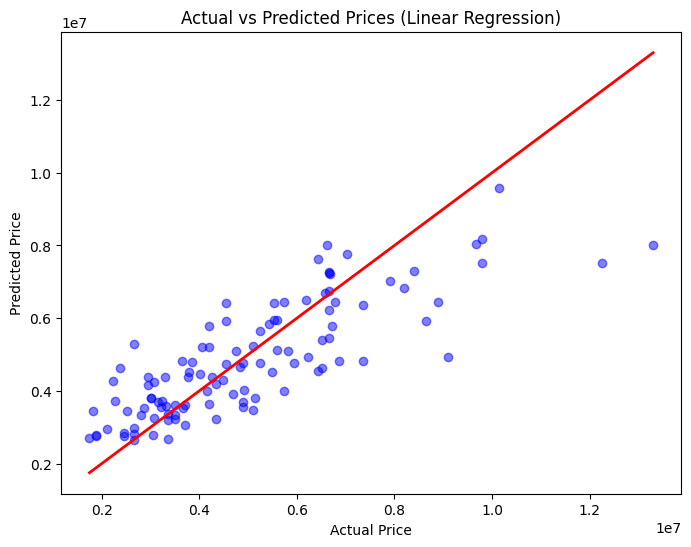

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()

## **23. Interpretation & Conclusion**
**What we learned:**
1.  **Data:** We processed housing data, converted categorical text ("yes/no") into numbers, and scaled the features.
2.  **Models:** We tested Linear, Polynomial, KNN, and Decision Trees.
3.  **Results:** Based on the comparison table, **Linear Regression** (or Polynomial) likely performed best with an R² score around 0.65-0.70.
4.  **Error (MAPE):** Our MAPE calculation showed the model is off by approximately 18-20%, which is decent for real estate data with limited features.
5.  **Factors:** Area and Bathrooms were likely the strongest drivers of price.